In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
from analyze import *
from read_waveform import data_reader


In [2]:
waveforms = np.array(
    data_reader(
        "data/20240115_SPE_LED365nm/SPE_365nm/run16_C1_LED_20ns_3V30/0_wave0_C1_LED_20ns_3V30.dat",
        10000,
        "all",
    )
)

# calculate_waveform_parameters(waveforms)
pulse_start = 4100
pulse_end = 6000
# baseline_cut = 20

	- Unpacking .dat file:
		20% done ...
		40% done ...
		60% done ...
		80% done ...
		100% done!


# Waveforms

First, we display average waveform

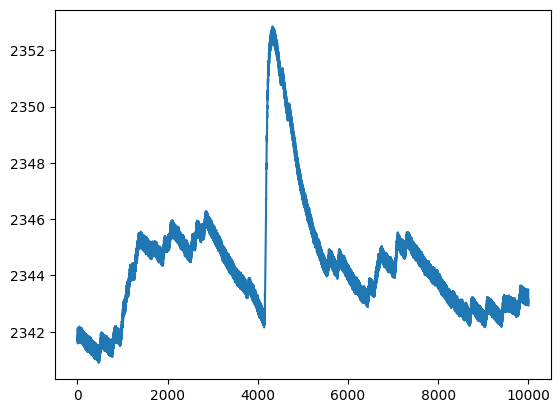

In [3]:
average_waveform = np.mean(waveforms, axis=0)
plt.plot(average_waveform)
plt.show()

## WIP
as well as some typical waveforms,

In [53]:
i = 0

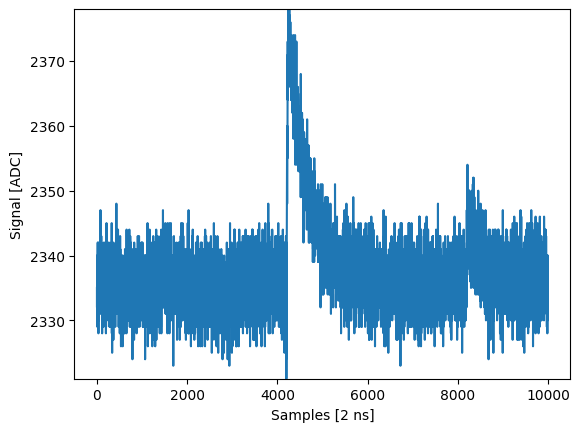

In [73]:
plt.plot(np.transpose(waveforms[i]))
plt.ylim([waveforms[i, pulse_start:pulse_end].min(), waveforms[50:60, pulse_start:pulse_end].max()])
plt.xlabel("Samples [2 ns]")
plt.ylabel("Signal [ADC]")
plt.show()
i += 1

Then, look at baseline

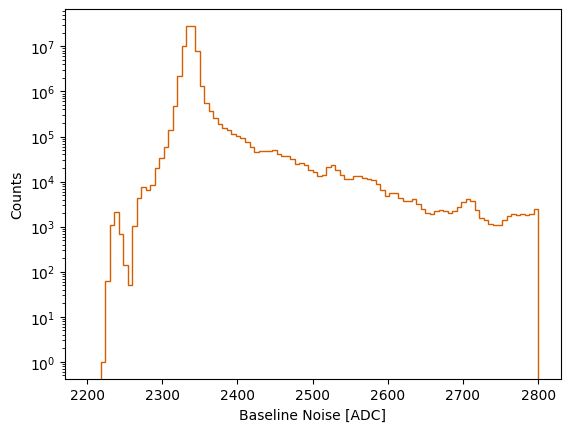

In [47]:
plt.hist(
    waveforms[:, :pulse_start].flatten(),
    bins=100,
    log=True,
    histtype='step',
    edgecolor='#D55E00',
    range=[2200, 2800]
)
plt.xlabel("Baseline Noise [ADC]")
plt.ylabel("Counts")
plt.show()

In [ ]:
baselines = get_baselines(waveforms[:, :pulse_start])

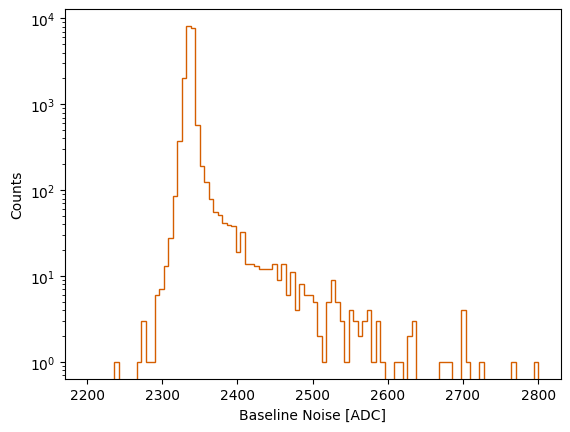

In [51]:
plt.hist(
    baselines,
    bins=100,
    log=True,
    histtype='step',
    edgecolor='#D55E00',
    range=[2200, 2800]
)
plt.xlabel("Baseline Noise [ADC]")
plt.ylabel("Counts")
plt.show()

Do 1d standard deviation histogram next.

Then corellation 2d histogram.

Then chi squared. This might be best.

In [6]:
baselines = get_baselines(waveforms[:, :pulse_start])
baseline_subtracted_waveforms = get_baseline_subtracted_waveforms(waveforms, baselines)
baseline_cut = calculate_baseline_cut(baselines)
cut_waveforms = baseline_subtracted_waveforms[baselines < baseline_cut]
charges = get_charges(cut_waveforms[:, pulse_start:pulse_end])

# plt.plot(np.transpose(baseline_subtracted_waveforms[50:65, pulse_start:pulse_end]))
# plt.plot(get_average_waveform(baseline_subtracted_waveforms))
# plt.hist(baselines)
# plt.hist(charges, bins=100, range=(0, 20000))
#plt.show()
#plt.savefig


baseline cut = 2763.8940992801645
